# EDA, Decision Tree & Ensemble Learning using Iris Dataset 

Classification And Regression Trees (CART for short) is a term introduced by [Leo Breiman](https://en.wikipedia.org/wiki/Leo_Breiman) to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

Impurity(Gini and entripy) which is used to split data in constructing the decision trees and apply the Decision Tree and ensemble learning algorithms to solve two real-world problems: a classification one and a regression one. 

In [ ]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import math
# make this notebook's output stable across runs
np.random.seed(0)

## Iris dataset

The Iris data set contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each observation (see image below):
- Sepal.Length: sepal length in centimeters.
- Sepal.Width: sepal width in centimeters.
- Petal.Length: petal length in centimeters.
- Petal.Width: petal width in centimeters.

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
  <tr>
    <td>Iris setosa</td>
    <td>Iris versicolor</td>
    <td>Iris virginica</td>
  </tr>
</table>


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


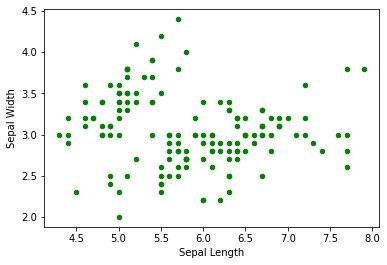

In [9]:
from sklearn.datasets import load_iris 
from matplotlib import pyplot as plt
iris=load_iris()
attr=iris.data
print(iris.feature_names)
s_len = attr[:,0]
s_width = attr[:,1]
plt.scatter(s_len,s_width , s = 20 , c = 'g')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

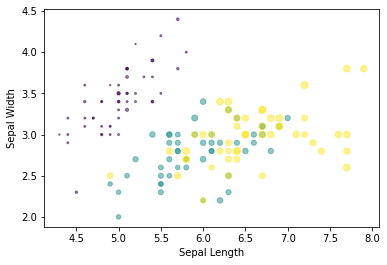

In [4]:
#bubble chart
target = iris.target
plt.scatter(s_len,s_width , c = target , s = attr[:,3]*20, alpha = 0.5)
#color depends on the color map
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

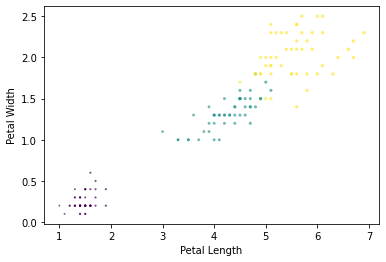

In [5]:
target = iris.target
plt.scatter(attr[:,2],attr[:,3] , c = target , s = attr[:,2], alpha = 0.5)
#color depends on the color map
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

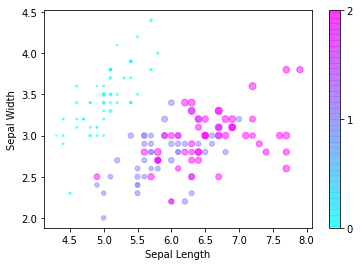

In [6]:
#bubble chart
plt.rcParams['image.cmap'] = 'cool'
target = iris.target
plt.scatter(s_len,s_width , c = target , s = attr[:,3]*20, alpha = 0.5)
#color depends on the color map
char = plt.colorbar( ticks=[0,1,2])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

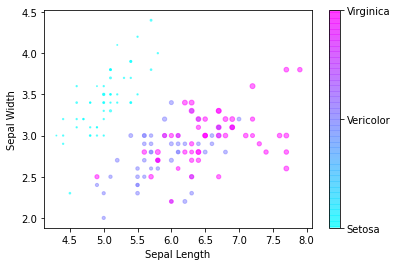

In [8]:
target = iris.target
plt.scatter(s_len,s_width , c = target , s = attr[:,3]*10, alpha = 0.5)
cbar = plt.colorbar( ticks=[0,1,2])
cbar.set_ticklabels(['Setosa','Vericolor','Virginica'])

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

In [ ]:
# load the iris train and test data from CSV files
train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_test.csv')

train_x = train.iloc[:,0:4]
train_y = train.iloc[:,4]

test_x = test.iloc[:,0:4]
test_y = test.iloc[:,4]

# print the number of instances in each class
print(train_y.value_counts().sort_index())
print(test_y.value_counts().sort_index())

Iris-setosa        34
Iris-versicolor    32
Iris-virginica     39
Name: species, dtype: int64
Iris-setosa        16
Iris-versicolor    18
Iris-virginica     11
Name: species, dtype: int64


### Decision Tree Classifier


In [ ]:
# model initialization
dtc = DecisionTreeClassifier(max_depth=2)

# train the model
dtc.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=2)

Visualizing the decision tree we just trained on the iris dataset and see how it makes predictions.

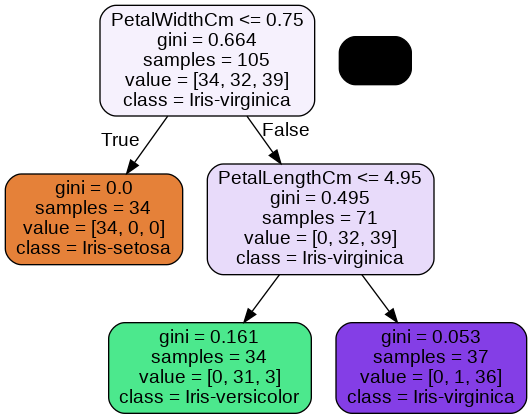

In [ ]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique()
class_names.sort()
export_graphviz(dtc, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Decision trees are easy to inteprete and is often referred to as *whitebox* machine learning algorithm. Let's see how this decision tree represented above makes predictions. Suppose you find an iris flower and want to classify it into setosa, versicolor or virginica. You start at the root node (the very top node in the tree). In this node, we check if the flower's patel length is smaller than or equal to 2.35 cm. If it is, we move to the left child and predict setosa to be its class. Otherwise, we move to the right child node. Then similarly we check if the petal length is smaller than or equal to 4.95 cm. If it is, we move to its left child node and predict versicolor to be its class. Otherwise, we move to its right child and predict virginica to be its class. 

#### Prediction with Decision tree
**making predictions using the trained decision tree model on the test data.**

In [ ]:
test_z = dtc.predict(test_x)
print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model confusion matrix:\n {}".format(confusion_matrix(test_y, test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))

model accuracy: 0.9111111111111111
model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


#### Hyper-parameters

Hyper-parameter controls the complexity of the decision tree model. For example, the deeper the tree is, the more complex patterns the model will be able to capture. In this exercise, we train the decision trees with increasing number of maximum depth and plot its performance. We should see the accuracy of the training data increase as the tree grows deeper, but the accuracy on the test data might not as the model will eventually start to overfit and does not generalize well on the unseen test data.

**for each value of max_depth, training a decision tree model and evaluatinf its accuracy on both train and test data, and plotting both accuracies in the figure**

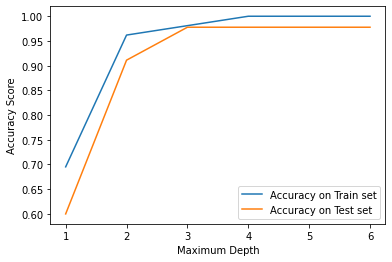

In [ ]:
max_depth_list = [1,2,3,4,5,6]
accuracy_train = [] 
accuracy_test = [] 
for x in max_depth_list:
    dtc = DecisionTreeClassifier(max_depth=x) 
    dtc.fit(train_x,train_y)
    train_z1 = dtc.predict(train_x)
    test_z1 = dtc.predict(test_x)
    accuracy_train.append(accuracy_score(train_y, train_z1))
    accuracy_test.append(accuracy_score(test_y, test_z1))

x = np.arange(len(max_depth_list)) + 1
plt.plot(x, accuracy_train, label='Accuracy on Train set') 
plt.plot(x, accuracy_test, label='Accuracy on Test set') 
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy Score') 
plt.legend() 
plt.show() 

#### Fine-tune the decision tree classifier

Decision tree is a very powerful model with very few assumptions about the incoming training data (unlike linear models, which assume the data linear), however, it is more likely to overfit the data and won't generalize well to unseen data. To void overfitting, we need to restrict the decision tree's freedom during training via regularization (e.g. max_depth, min_sample_split, max_leaf_nodes and etc.).

To fine-tune the model and combat overfitting, use grid search with cross-validation (with the help of the GridSearchCV class) to find the best hyper-parameter settings for the DecisionTreeClassifier. In particular, we would like to fine-tune the following hyper-parameters:
- **criteria**: this defines how we measure the quality of a split. we can choose either "gini" for the Gini impurity or "entropy" for the information gain.
- **max_depth**: the maximum depth of the tree. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. But meanwhile, deeper trees are more likely to overfit the data. For this practice, we will choose from {1, 2, 3} given there are only 4 features in the iris dataset.
- **min_samples_split**: This value represents the minimum number of samples required to split an internal node. The smaller this value is, the deeper the tree will grow, thus more likely to overfit. On the other hand, if the value is really large (the size of the training data in the extreme case), the tree will be very shallow and could suffer from underfit. In this practice, we choose from {0.01, 0.05, 0.1, 0.2}.

**Using grid search with 3-fold cross-validation to fine-tune the decision tree model and output the best hyper-parameters.**

In [ ]:
parameters = {
    "max_depth": [1,2, 3, 4], 
    "min_samples_split": [0.01,0.05,0.1, 0.2]
}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, parameters, cv=3)
grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(grid.best_score_))
print("The best hyper parameter setting is {}".format(grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'max_depth': 3, 'min_samples_split': 0.01}


#### Prediction and Evaluation

fine-tuning decision tree classifier based on the training data, applying this model to make predictions on the test data and evaluate its performance.

In [ ]:
test_z = grid.predict(test_x)

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))
print("model confusion matrix:\n {}".format(confusion_matrix(test_y, test_z, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])))

model accuracy: 0.9777777777777777
model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### Random Forest

**Random Forest together with Gridsearch to the Iris dataset and evaluate its accuracy.**

In [ ]:
parameters = {
    "n_estimators": [20, 40],
    "max_depth": [2, 4], 
    "min_samples_split": [0.05, 0.1, 0.2]
}

rfc_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), parameters, cv=3)
rfc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(rfc_grid.best_score_))
print("The best hyper parameter setting is {}".format(rfc_grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'max_depth': 2, 'min_samples_split': 0.05, 'n_estimators': 40}


In [ ]:
test_z = rfc_grid.predict(test_x)
test_z_prob = rfc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))

model accuracy: 0.9555555555555556


### Adaboost

**Adaboost together with Gridsearch to the Iris dataset and evaluate its accuracy**

In [ ]:
parameters = {
    "n_estimators": [20, 40],
    "learning_rate": [0.01, 0.1, 1, 10]
}

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=0)
adaboost_grid = GridSearchCV(adaboost, parameters, cv=3)
adaboost_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(adaboost_grid.best_score_))
print("The best hyper parameter setting is {}".format(adaboost_grid.best_params_))

The best score is 0.9523809523809522
The best hyper parameter setting is {'learning_rate': 0.01, 'n_estimators': 20}


In [ ]:
test_z = adaboost_grid.predict(test_x)
test_z_prob = adaboost_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))

model accuracy: 0.9777777777777777


### Gradient Boosting

**Boosting together with Gridsearch to the Iris dataset and evaluate its accuracy.**

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.1],
    "min_samples_split": [0.05, 0.1, 0.2],
    "max_depth":[2, 4],
    "n_estimators":[100]
}

gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
gbc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(gbc_grid.best_score_))
print("The best hyper parameter setting is {}".format(gbc_grid.best_params_))

The best score is 0.9619047619047619
The best hyper parameter setting is {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 2, 'min_samples_split': 0.05, 'n_estimators': 100}


In [ ]:
test_z = gbc_grid.predict(test_x)
test_z_prob = gbc_grid.predict_proba(test_x)[:,1]

print("model accuracy: {}".format(accuracy_score(test_y, test_z)))

model accuracy: 0.9777777777777777


---